In [1]:
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.statespace.sarimax import SARIMAX

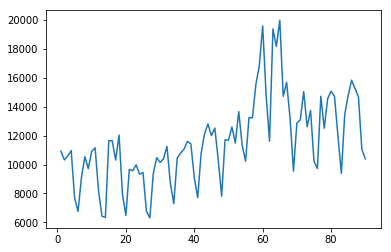

In [7]:
dta=[10930,10318,10595,10972,7706,6756,9092,10551,9722,10913,11151,8186,6422,
6337,11649,11652,10310,12043,7937,6476,9662,9570,9981,9331,9449,6773,6304,9355,
10477,10148,10395,11261,8713,7299,10424,10795,11069,11602,11427,9095,7707,10767,
12136,12812,12006,12528,10329,7818,11719,11683,12603,11495,13670,11337,10232,
13261,13230,15535,16837,19598,14823,11622,19391,18177,19994,14723,15694,13248,
9543,12872,13101,15053,12619,13749,10228,9725,14729,12518,14564,15085,14722,
11999,9390,13481,14795,15845,15271,14686,11054,10395]
dta_list = np.arange(0,len(dta))+1

plt.plot(dta_list, dta)
plt.show()

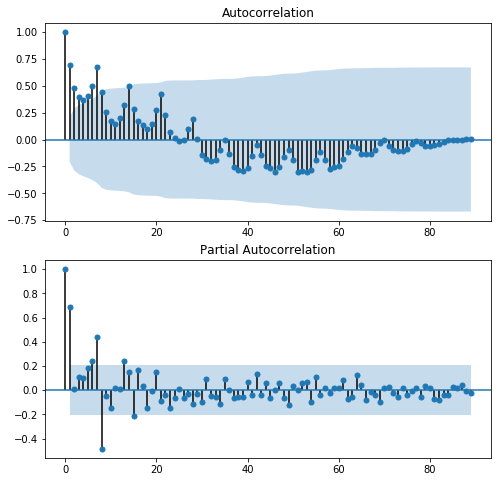

In [20]:
# ACP - PACP
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(8,8))
plot_acf(x=dta, ax=ax1);
plot_pacf(x=dta, ax=ax2, method='ldb');

In [28]:
# BOTH SEASONALITY AND TREND ARE PRESENT

# Seasonal diff s=7

new_series=diff(dta,k_diff=1, k_seasonal_diff=1, seasonal_periods=7)
test=adfuller(new_series, maxlag=new_series.shape[0]-2)
print(test[1]*100)


1.5984400150847082e-17


/home/farshad/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:846: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


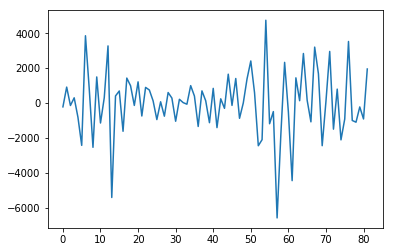

In [29]:
plt.plot(np.arange(0,len(new_series)), new_series)
plt.show()

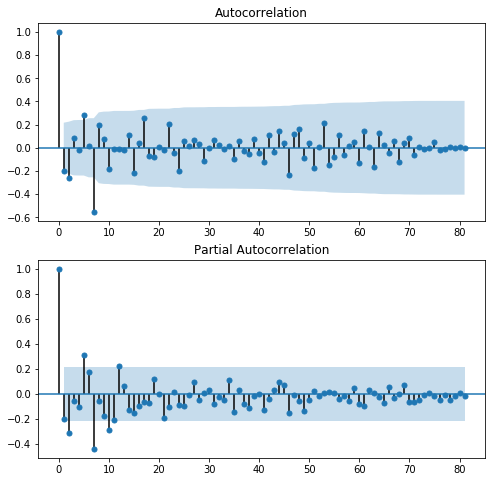

In [30]:
# ACP - PACP
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(8,8))
plot_acf(x=new_series, ax=ax1);
plot_pacf(x=new_series, ax=ax2, method='ldb');

In [31]:
model=SARIMAX(dta, order=(2, 1, 1), seasonal_order=(1, 1, 1, 7))

In [32]:
res=model.fit()

In [34]:
pred=res.predict()

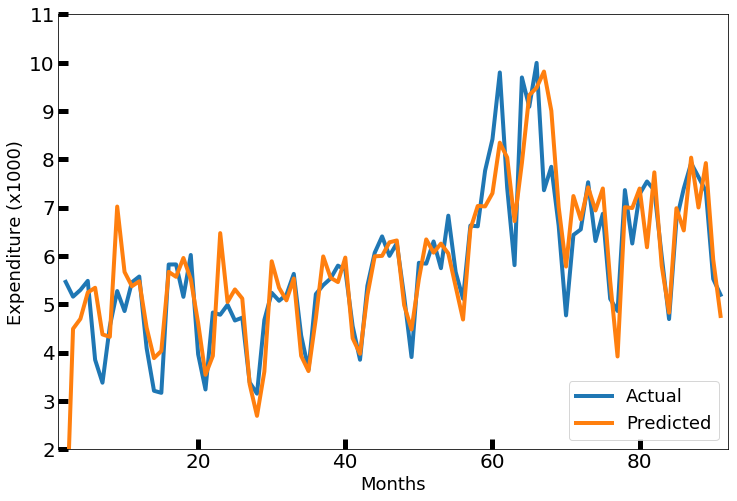

In [66]:
plt.figure(figsize=(12,8), facecolor=None)
plt.clf()
line1=plt.plot(dta_list+1, np.array(dta)/2/1000, linewidth=4.0, label='Actual')
line2=plt.plot(dta_list+1, np.array(pred)/2/1000, linewidth=4.0, label='Predicted')

plt.xlabel('Months', fontsize=18)
plt.ylabel('Expenditure (x1000)', fontsize=18)
#plt.yticks(rotation=45)
plt.tick_params(direction='in', length=10, width=5, colors='k',
               grid_color='k', grid_alpha=1, labelsize=20)
plt.xlim(1, len(dta)+2)
plt.legend(loc='lower right', fontsize=18)
plt.ylim(2, 11)

plt.show()